In [4]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from sectorizedradialprofile.calculate_radial_profile import CalculateRadialProfile
import matplotlib.pyplot as plt
from skimage import io
import sectorizedradialprofile
print(sectorizedradialprofile.__version__)
import numpy as np

1.1.1


In [2]:
%matplotlib notebook

Load the data

In [3]:
data_file = 'data_2_circles.tif'
im = io.imread(data_file)
working_data = im[:,:,0]

Visualize data

<IPython.core.display.Javascript object>


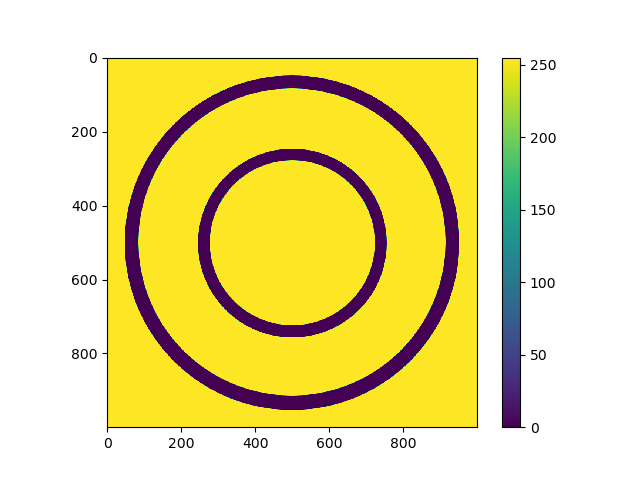

In [4]:
plt.figure(0)
plt.imshow(working_data)
plt.colorbar()

Define parameters

In [5]:
center = (500, 500)  # Has to be in a form of (x0, y0)
radius = 455  # Maximum radius of your radial plot. It can be 'None' if you don't want to constrain.
angle_range = (0, 90)  # Has to be in a form of (from_angle, to_angle). It can be 'None' if you don't want to constrain.

Calculate profile

In [6]:
o_profile = CalculateRadialProfile(data=working_data)  # Initialize the class with data input
o_profile.add_params(center=center, radius=radius, angle_range=angle_range)
o_profile.calculate()

<IPython.core.display.Javascript object>


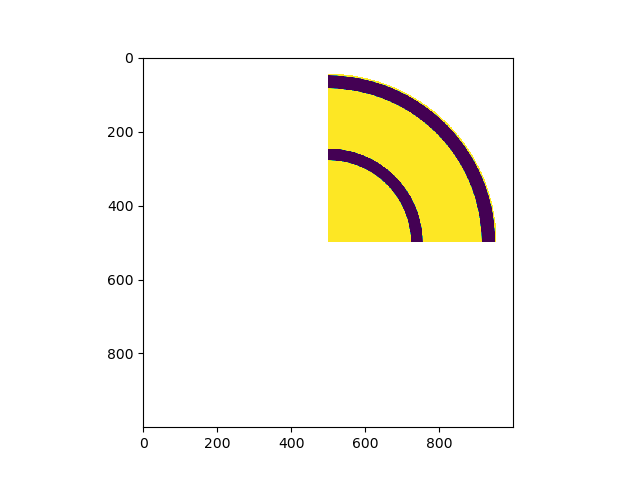

In [7]:
plt.figure(1)
plt.imshow(o_profile.working_data
          )

In [9]:
profile = o_profile.radial_profile
print(profile.head())
print(profile.tail())

           mean  std  sem
radius                   
0.000000  255.0  NaN  NaN
1.000000  255.0  0.0  0.0
1.414214  255.0  NaN  NaN
2.000000  255.0  0.0  0.0
2.236068  255.0  0.0  0.0
             mean  std  sem
radius                     
454.981318  255.0  0.0  0.0
454.986813  255.0  0.0  0.0
454.990110  255.0  0.0  0.0
454.991209  255.0  0.0  0.0
455.000000  255.0  0.0  0.0


Check results

<IPython.core.display.Javascript object>


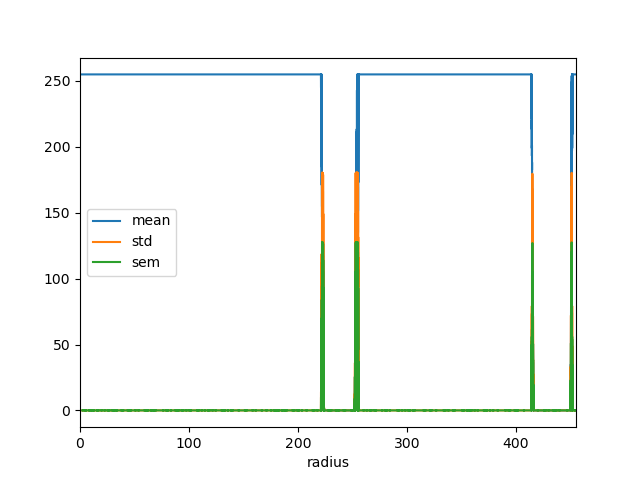

In [10]:
profile.plot()

<IPython.core.display.Javascript object>


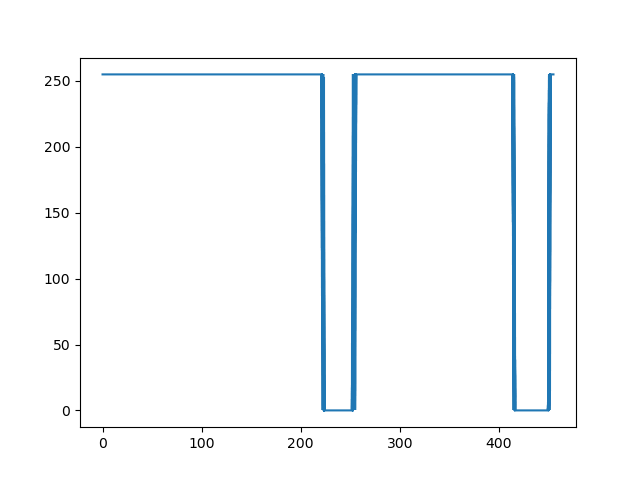

<ErrorbarContainer object of 3 artists>

In [11]:
plt.figure(3)
plt.errorbar(x=profile.index, y=profile['mean'], yerr=profile['sem'])

# test unit tests 

In [ ]:
# test calculate_array_of_angles

In [5]:
data = np.ones((10, 10))
[height, width] = np.shape(data)
[y0, x0] = [int(height / 2), int(width / 2)]
center = (x0, y0)
angle_range = (0, 90)
o_calculate = CalculateRadialProfile(data=data)
o_calculate.add_params(center=center, angle_range=angle_range)
o_calculate.calculate()
array_angle_deg = o_calculate.array_angle_deg

<IPython.core.display.Javascript object>


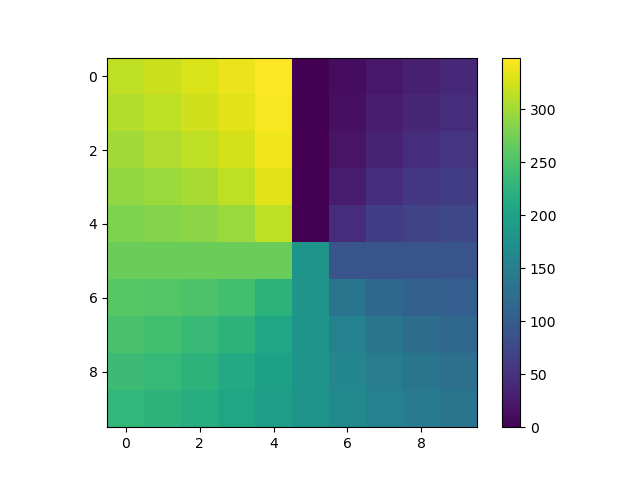

In [7]:
plt.figure(10)
plt.imshow(array_angle_deg)
plt.colorbar()

In [8]:
# test_full_radial_profile

In [16]:
data_path = 'circle_profile.tif'
data = io.imread(data_path)
o_calculate = CalculateRadialProfile(data=data)
center = (500, 600)
o_calculate.add_params(center=center)
o_calculate.calculate()
radial_profile = o_calculate.radial_profile

radius_returned = radial_profile.index
mean_counts_returned = np.array(radial_profile["mean"])
print(mean_counts_returned)

[ 500.70709229  501.14411926  501.49767303 ... 1279.55273438 1280.00091553
 1280.32080078]


<IPython.core.display.Javascript object>


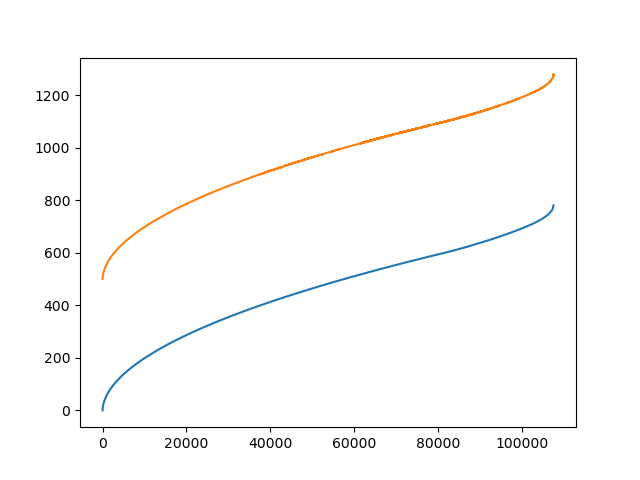

In [13]:
plt.figure(11)
plt.plot(radius_returned)
plt.plot(mean_counts_returned)

<IPython.core.display.Javascript object>


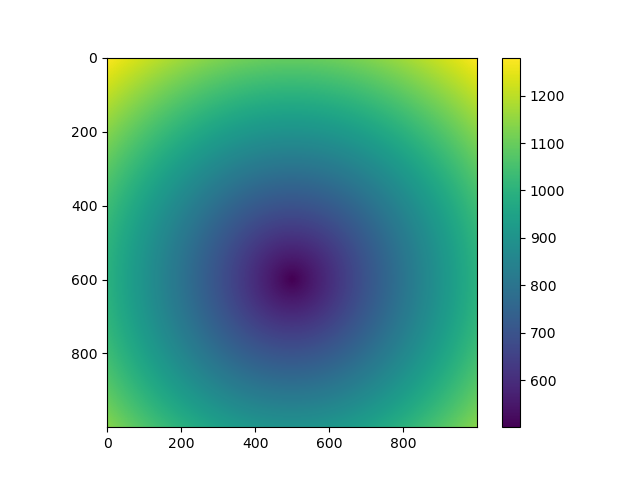

In [15]:
plt.figure(12)
plt.imshow(data)
plt.colorbar()

In [17]:
# test_new_working_data

In [18]:
data = np.ones((10, 10))
[height, width] = np.shape(data)
[y0, x0] = [int(height / 2), int(width / 2)]
center = (x0, y0)
angle_range = (0, 90)
o_calculate = CalculateRadialProfile(data=data)
o_calculate.add_params(center=center, angle_range=angle_range)
o_calculate.calculate()
working_data = o_calculate.working_data
real_working_data = np.zeros((10, 10))
real_working_data[:] = np.nan
real_working_data[0:6, 5:, ] = 1

<IPython.core.display.Javascript object>


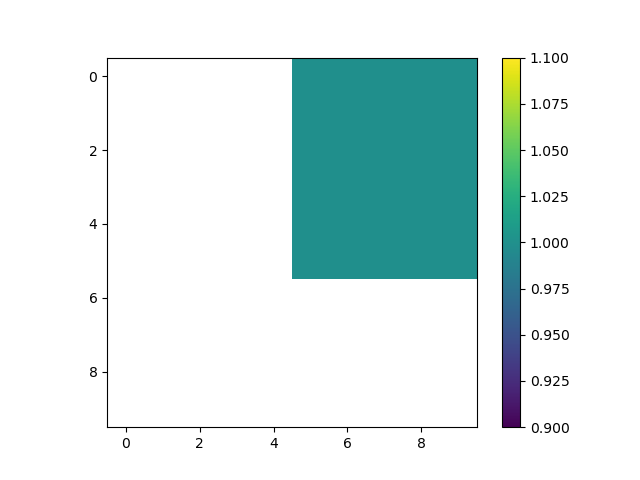

In [19]:
plt.figure(13)
plt.imshow(real_working_data)
plt.colorbar()